# produce the figures/numbers for the cosmic rejection paper

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0, '.'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

In [13]:
figures_path = "/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/ApplicationOfCuts/"

In [2]:
# ------------------------------------------------
# Aug-30, 2017
def get_Nreduced_MCbnbDATAcosmic(reduced_MCbnbDATAcosmic = dict()):
    Noriginal , Nreduced , freduced = dict() , dict() , dict()
    for pair_type in pair_types:
        sam = MCbnbDATAcosmicSamples[pair_type]
        Noriginal[pair_type] = len(MCbnbDATAcosmicSamples[pair_type])
        Nreduced[pair_type] = float(len(reduced_MCbnbDATAcosmic[pair_type]))
        freduced[pair_type] = 100.0 * Nreduced[pair_type]/Noriginal[pair_type]
    return Nreduced , freduced
# ------------------------------------------------

      
# ------------------------------------------------
# Oct. 13, 2017
def get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=None, cut_name = 'PIDa', cut_label=None , reduced_MCbnbDATAcosmic = dict()):
    ''' 
        return
        eff (mu-p) , pur (mu-p), eff (CC 1p 0pi) , pur (CC 1p 0pi)
    '''
    eff = dict()
    pur = dict()
    Nreduced_MCbnbDATAcosmic , freduced_MCbnbDATAcosmic = get_Nreduced_MCbnbDATAcosmic(reduced_MCbnbDATAcosmic=reduced_MCbnbDATAcosmic)
    Ntot = (Nreduced_MCbnbDATAcosmic['1mu-1p']+Nreduced_MCbnbDATAcosmic['cosmic']+Nreduced_MCbnbDATAcosmic['other pairs'])
    
    eff['1mu-1p'] = freduced_MCbnbDATAcosmic['1mu-1p']
    pur['1mu-1p'] = 100.*Nreduced_MCbnbDATAcosmic['1mu-1p']/Ntot if Ntot>0 else 0
    
    eff['CC 1p 0pi'] = freduced_MCbnbDATAcosmic['CC 1p 0pi']
    pur['CC 1p 0pi'] = 100.*Nreduced_MCbnbDATAcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0
    
    pureff_MCbnbDATAcosmic_cut = pd.DataFrame({'label':cut_label
                               ,'$\mu p$ eff.':'%.1f'%eff['1mu-1p']+'%'
                               ,'$\mu p$ pur.':'%.1f'%pur['1mu-1p']+'%'
                               ,'CC$0\pi 1 p$ eff.':'%.1f'%freduced_MCbnbDATAcosmic['CC 1p 0pi']+'%'
                               ,'CC$0\pi 1 p$ pur.':'%.1f'%(100.*Nreduced_MCbnbDATAcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0)+'%'}
                               , index=[cut_name]
                              )
    for pair_type in pair_types: pureff_MCbnbDATAcosmic_cut[pair_type] = '%.1f'%freduced_MCbnbDATAcosmic[pair_type]+'%' +' (%.0f)'%Nreduced_MCbnbDATAcosmic[pair_type]
    pureff_MCbnbDATAcosmic = pureff_MCbnbDATAcosmic.append(pureff_MCbnbDATAcosmic_cut)
    return pureff_MCbnbDATAcosmic
# ------------------------------------------------

In [3]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

28843 pairs from MC-BNB + cosmic DATA overlay
18998 pairs in FV
5099 are 1mu-1p, 26.8%
4347 are other pairs, 22.9%
9552 are cosmic, 50.3%
--------------------------------------------------------------
2008 are CC 1p 0pi, 10.6%


# apply the cuts in order to
    1 select the optimal ones, and
    2 study the cut sensitivity

In [4]:
pair_types   = ['1mu-1p'   ,'other pairs','cosmic' ,'CC 1p 0pi'    ]
MClabels     = ['1$\\mu$1p','other pairs','cosmic' ,'CC 1p 0$\\pi$']
MCcolors     = ['teal'     ,'red'        ,'orange' ,'blue'         ]
MCcmaps      = ['Greens'   ,'Reds'       ,'Oranges','Blues'        ]

In [5]:
def check_cuts(PIDa_p_min=12
    ,minPEcut = 100
    ,maxdYZcut = 200                              
    ,delta_theta_12=60  # deg.
    ,opt_box=(50,100) # [Nwires x Nticks]
    ,r_max_RdQ_CC1p0pi = 0.35 # sphere in U,V,Y space, apply a cut only to CC1p0pi
    # --- -- --- - -- -- --- --
    ,delta_Delta_phi=40 # deg.
    ,Pt_max=0.35        # GeV/c
    ):
    
    reduced_MCbnbDATAcosmic = dict()
    pureff_MCbnbDATAcosmic = pd.DataFrame()
    pureff_MCbnbDATAcosmic_numbers = pd.DataFrame()

    for pair_type in pair_types:#{
        reduced_MCbnbDATAcosmic[pair_type] = MCbnbDATAcosmicSamples[pair_type]
    #}
    reduced_MCbnbDATAcosmicSamples['no cut'] = reduced_MCbnbDATAcosmic

    # before cuts
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam
    #}
    reduced_MCbnbDATAcosmicSamples['no cut'] = reduced_MCbnbDATAcosmic
    pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name = 'no cut', cut_label='no cut', reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


    # cut 1: PIDa
    # -- -- -- -- -- ---- - ---- 
    cut_name , cut_label = 'PIDa','${PID}_a>%.0f$'%PIDa_p_min
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['PIDa_assigned_proton']>PIDa_p_min]
    #}
    reduced_MCbnbDATAcosmicSamples['PIDa'] = reduced_MCbnbDATAcosmic
    pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


    # cut 2: Optical filtering
    # -- -- -- -- -- ---- - ---- 
    
    cut_name , cut_label = 'flashes', '$N_{flashes}>0$'
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['PIDa'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['Nflashes']>0]
    #}
    reduced_MCbnbDATAcosmicSamples['flashes'] = reduced_MCbnbDATAcosmic
    pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name=cut_name,cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)

    cut_name , cut_label = 'flash', 'optical filter'
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['flashes'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[(sam['ClosestFlash_TotalPE'] > minPEcut)
                                                 &(sam['ClosestFlash_YZdistance'] < maxdYZcut)]
    #}
    reduced_MCbnbDATAcosmicSamples['flash'] = reduced_MCbnbDATAcosmic
    pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name=cut_name,cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


    # cut 3: require that the longer track is the one with larger PIDa
    # -- -- -- -- -- ---- - ---- 
    cut_name , cut_label = 'length', r'$l_{\mu}>l_{p}$'
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['flash'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['PIDa_long'] < sam['PIDa_short']]
    #}
    reduced_MCbnbDATAcosmicSamples['length'] = reduced_MCbnbDATAcosmic
    pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)

    # cut 4: theta_{12}
    # -- -- -- -- -- ---- - ---- 
    cut_name, cut_label='non-collinearity' ,'$|\theta_{1,2}-90^0|<%.0f^0$'%delta_theta_12
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['length'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[np.abs(sam['theta_12']-90)<delta_theta_12]
    #}
    reduced_MCbnbDATAcosmicSamples['non-collinearity'] = reduced_MCbnbDATAcosmic
    pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


    # cut 5: vertex activity (RdQ)
    # -- -- -- -- -- ---- - ---- 
    cut_name , cut_label = 'vertex activity' , '$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<%.2f$'%r_max_RdQ_CC1p0pi
    box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
    Ru,Rv,Ry = 'RdQaroundVertex[plane 0]'+box_str,'RdQaroundVertex[plane 1]'+box_str,'RdQaroundVertex[plane 2]'+box_str
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{         
        sam = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]
        sam = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                      | 
                      (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
        reduced_MCbnbDATAcosmic[pair_type] = sam        
    #}
    reduced_MCbnbDATAcosmicSamples['vertex activity'] = reduced_MCbnbDATAcosmic
    pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name=cut_name ,cut_label=cut_label , reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)

    # cut 6: delta phi
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
    #}
    reduced_MCbnbDATAcosmicSamples['delta phi'] = reduced_MCbnbDATAcosmic
    pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name = 'delta phi', cut_label='$|\Delta \phi - \pi|<%.0f^0$'%delta_Delta_phi, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)

    # cut 6.5: Pt<0.35 without application of the $\Delta phi$ cut
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['reco_Pt']<Pt_max]
    #}
    reduced_MCbnbDATAcosmicSamples['Pt No Delta phi'] = reduced_MCbnbDATAcosmic
    pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name='Pt no Delta phi', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)


    # cut 7: Pt<0.35
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['reco_Pt']<Pt_max]
    #}
    reduced_MCbnbDATAcosmicSamples['soft Pt'] = reduced_MCbnbDATAcosmic
    pureff_MCbnbDATAcosmic = get_pureff_MCbnbDATAcosmic_cut(pureff_MCbnbDATAcosmic=pureff_MCbnbDATAcosmic,cut_name='soft Pt', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)

    return pureff_MCbnbDATAcosmic

In [12]:
pureff_MCbnbDATAcosmic = check_cuts(
    PIDa_p_min=13
    ,minPEcut = 100
    ,maxdYZcut = 180                              
    ,delta_theta_12=55  # deg.
    ,r_max_RdQ_CC1p0pi = 0.33 # sphere in U,V,Y space, apply a cut only to CC1p0pi
    # --- -- --- - -- -- --- --
    ,delta_Delta_phi=35 # deg.
    ,Pt_max=0.35        # GeV/c
    )
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.8%,100.0%,10.6%,no cut,100.0% (5099),100.0% (4347),100.0% (9552),100.0% (2008)
PIDa,85.4%,53.6%,84.0%,20.7%,${PID}_a>13$,85.4% (4356),55.3% (2405),14.3% (1369),84.0% (1686)
flashes,85.1%,55.9%,83.7%,21.7%,$N_{flashes}>0$,85.1% (4340),55.1% (2397),10.7% (1024),83.7% (1681)
flash,79.1%,58.2%,77.4%,22.4%,optical filter,79.1% (4035),52.4% (2279),6.5% (618),77.4% (1555)
length,65.7%,67.6%,67.7%,27.5%,$l_{\mu}>l_{p}$,65.7% (3348),28.9% (1255),3.7% (351),67.7% (1360)
non-collinearity,59.0%,73.5%,64.1%,31.5%,"$|\theta_{1,2}-90^0|<55^0$",59.0% (3007),20.6% (894),2.0% (190),64.1% (1288)
vertex activity,39.7%,77.1%,55.3%,42.3%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",39.7% (2023),11.5% (499),1.1% (102),55.3% (1110)
delta phi,26.5%,90.6%,47.9%,64.5%,$|\Delta \phi - \pi|<35^0$,26.5% (1351),2.7% (116),0.3% (24),47.9% (961)
Pt no Delta phi,30.0%,85.0%,49.4%,55.1%,$p_{t}<0.35$ GeV/c,30.0% (1529),5.1% (223),0.5% (46),49.4% (991)
soft Pt,23.3%,92.9%,43.8%,68.9%,$p_{t}<0.35$ GeV/c,23.3% (1186),1.7% (76),0.1% (14),43.8% (879)


# sensitivity to the cuts using a Gaussian sampling

In [15]:
Nrand = 1000
Ncosmic_det,fcosmic_det,NCC1p0pi_det,fCC1p0pi_det=[],[],[],[]
Ncosmic_all,fcosmic_all,NCC1p0pi_all,fCC1p0pi_all=[],[],[],[]
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru,Rv,Ry = 'RdQaroundVertex[plane 0]'+box_str,'RdQaroundVertex[plane 1]'+box_str,'RdQaroundVertex[plane 2]'+box_str
for irand in range(Nrand):
    if irand%(Nrand/10)==0: print '%.1f'%(100.*float(irand)/Nrand)+'%'
    PIDa_p_min = np.random.normal( 13 , 1)
    minPEcut = np.random.normal( 100 , 20)
    maxdYZcut = np.random.normal( 200 , 50)
    delta_theta_12 = np.random.normal( 55 , 5 )
    r_max_RdQ_CC1p0pi = np.random.normal( 0.33 , 0.05 )
    delta_Delta_phi = np.random.normal( 35 , 5 )
    Pt_max = np.random.normal( 0.35 , 0.05 )
    
    # detector cuts
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[(sam['PIDa_assigned_proton']>PIDa_p_min)
                                             &(sam['ClosestFlash_TotalPE'] > minPEcut)                                                
                                             &(sam['ClosestFlash_YZdistance'] < maxdYZcut)
                                             &(sam['PIDa_long'] < sam['PIDa_short'])
                                             &(np.abs(sam['theta_12']-90)<delta_theta_12)
                                             &((sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1)                                              
                                               | (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) 
                                                <= r_max_RdQ_CC1p0pi))]
    #}
    Ncosmic_det.append(len(reduced_MCbnbDATAcosmic['cosmic']))
    fcosmic_det.append(100.*float(Ncosmic_det[-1])/len(reduced_MCbnbDATAcosmicSamples['no cut']['cosmic']))
    NCC1p0pi_det.append(len(reduced_MCbnbDATAcosmic['CC 1p 0pi']))
    fCC1p0pi_det.append(100.*float(NCC1p0pi_det[-1])/len(reduced_MCbnbDATAcosmicSamples['no cut']['CC 1p 0pi']))

    # all cuts
    reduced_MCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[(sam['PIDa_assigned_proton']>PIDa_p_min)
                                                 &(sam['Nflashes']>0)
                                                 &(sam['ClosestFlash_TotalPE'] > minPEcut)                                                
                                                 &(sam['ClosestFlash_YZdistance'] < maxdYZcut)
                                                 &(sam['PIDa_long'] < sam['PIDa_short'])
                                                 &(np.abs(sam['theta_12']-90)<delta_theta_12)
                                                 &((sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1)                                              
                                                   | (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) 
                                                    <= r_max_RdQ_CC1p0pi))
                                                 &(np.abs(sam['delta_phi']-180.)<delta_theta_12)
                                                 &(sam['reco_Pt']<Pt_max)]
    #}
    Ncosmic_all.append(len(reduced_MCbnbDATAcosmic['cosmic']))
    fcosmic_all.append(100.*float(Ncosmic_all[-1])/len(reduced_MCbnbDATAcosmicSamples['no cut']['cosmic']))
    NCC1p0pi_all.append(len(reduced_MCbnbDATAcosmic['CC 1p 0pi']))
    fCC1p0pi_all.append(100.*float(NCC1p0pi_all[-1])/len(reduced_MCbnbDATAcosmicSamples['no cut']['CC 1p 0pi']))
            
print 'done.'

0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
done.


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/ApplicationOfCuts/CutSensitivity/AfterDetectorCuts.pdf


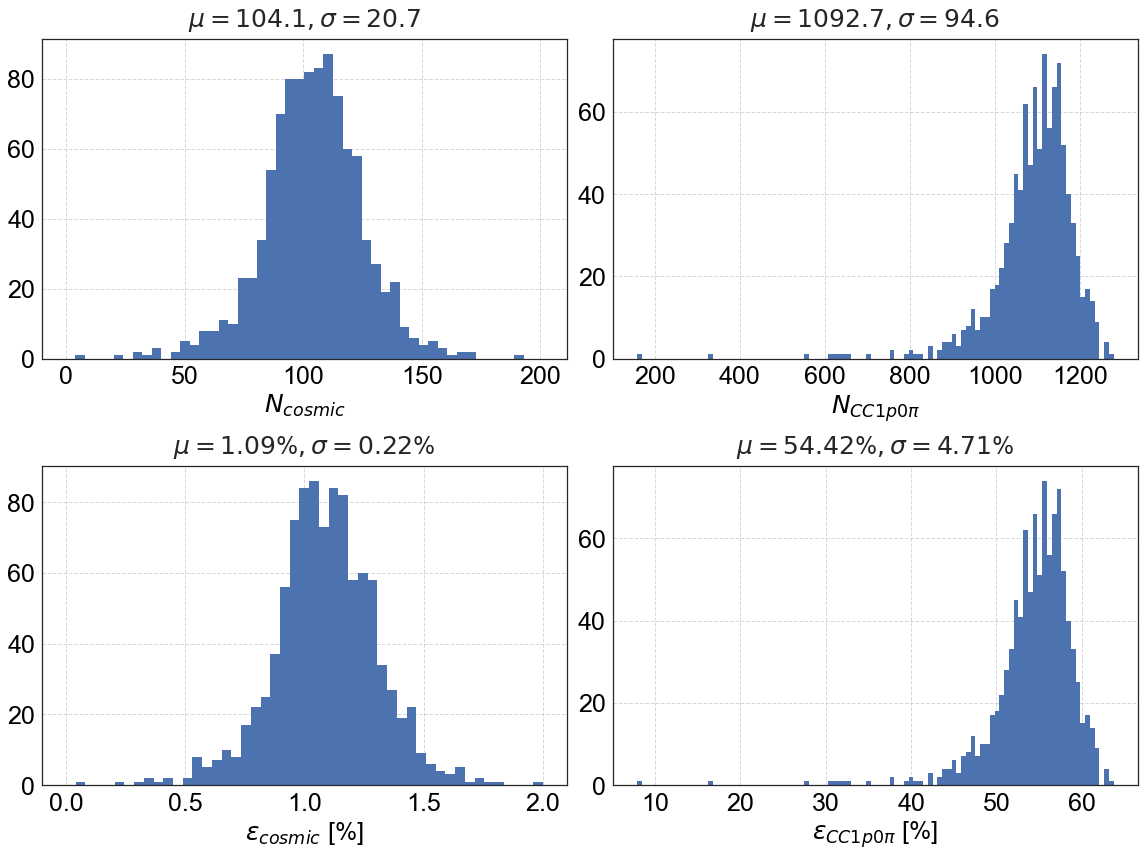

In [17]:
fig = plt.figure(figsize=(16,12))

ax=fig.add_subplot(2,2,1)
plt.hist(Ncosmic_det,bins=np.linspace(0,201,51))
mean,std=np.mean(Ncosmic_det),np.std(Ncosmic_det)
set_axes(ax,r'$N_{cosmic}$',do_add_grid=True,title=r'$\mu=%.1f,\sigma=%.1f$'%(mean,std))

ax=fig.add_subplot(2,2,2)
plt.hist(NCC1p0pi_det,bins=100)
mean,std=np.mean(NCC1p0pi_det),np.std(NCC1p0pi_det)
set_axes(ax,r'$N_{CC1p0\pi}$',do_add_grid=True,title=r'$\mu=%.1f,\sigma=%.1f$'%(mean,std))

ax=fig.add_subplot(2,2,3)
plt.hist(fcosmic_det,bins=np.linspace(0,2,50))
mean,std=np.mean(fcosmic_det),np.std(fcosmic_det)
set_axes(ax,r'$\epsilon_{cosmic}$ [%]',do_add_grid=True,title=(r'$\mu=%.2f$'%mean+'%'+r'$,\sigma=%.2f$'%std+'%'))

ax=fig.add_subplot(2,2,4)
plt.hist(fCC1p0pi_det,bins=100)
mean,std=np.mean(fCC1p0pi_det),np.std(fCC1p0pi_det)
set_axes(ax,r'$\epsilon_{CC1p0\pi}$ [%]',do_add_grid=True,title=(r'$\mu=%.2f$'%mean+'%'+r'$,\sigma=%.2f$'%std+'%'))


plt.tight_layout()
filename = figures_path+'CutSensitivity/AfterDetectorCuts.pdf'
plt.savefig(filename)
print 'saved',filename

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/ApplicationOfCuts/CutSensitivity/AfterAllCuts.pdf


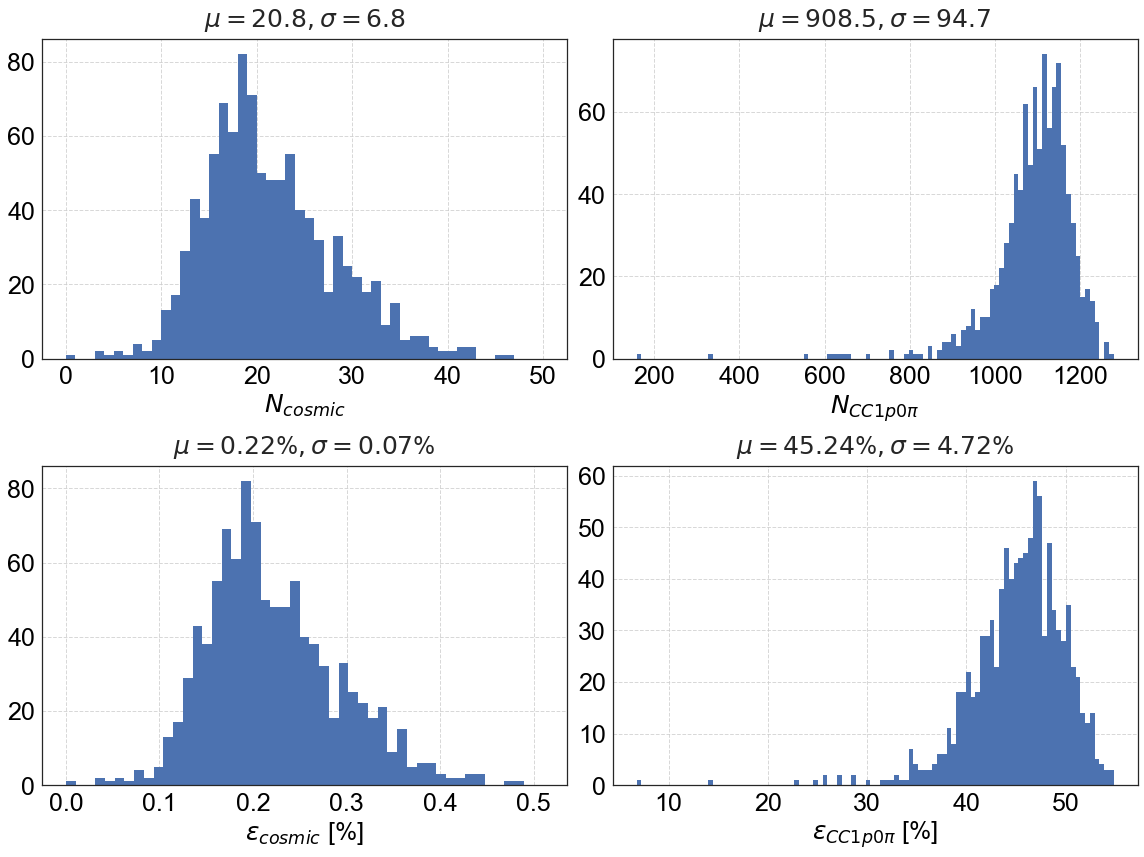

In [18]:
fig = plt.figure(figsize=(16,12))

ax=fig.add_subplot(2,2,1)
plt.hist(Ncosmic_all,bins=np.linspace(0,50,51))
mean,std=np.mean(Ncosmic_all),np.std(Ncosmic_all)
set_axes(ax,r'$N_{cosmic}$',do_add_grid=True,title=r'$\mu=%.1f,\sigma=%.1f$'%(mean,std))

ax=fig.add_subplot(2,2,2)
plt.hist(NCC1p0pi_det,bins=100)
mean,std=np.mean(NCC1p0pi_all),np.std(NCC1p0pi_all)
set_axes(ax,r'$N_{CC1p0\pi}$',do_add_grid=True,title=r'$\mu=%.1f,\sigma=%.1f$'%(mean,std))

ax=fig.add_subplot(2,2,3)
plt.hist(fcosmic_all,bins=np.linspace(0,0.51,50))
mean,std=np.mean(fcosmic_all),np.std(fcosmic_all)
set_axes(ax,r'$\epsilon_{cosmic}$ [%]',do_add_grid=True,title=(r'$\mu=%.2f$'%mean+'%'+r'$,\sigma=%.2f$'%std+'%'))

ax=fig.add_subplot(2,2,4)
plt.hist(fCC1p0pi_all,bins=100)
mean,std=np.mean(fCC1p0pi_all),np.std(fCC1p0pi_all)
set_axes(ax,r'$\epsilon_{CC1p0\pi}$ [%]',do_add_grid=True,title=(r'$\mu=%.2f$'%mean+'%'+r'$,\sigma=%.2f$'%std+'%'))


plt.tight_layout()
filename = figures_path+'CutSensitivity/AfterAllCuts.pdf'
plt.savefig(filename)
print 'saved',filename